Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import RMSprop

In [2]:
IMAGE_SIZE = (12, 28)
BATCH_SIZE = 128
EPOCHS = 50
WEIGHT_INIT = 0.05
WEIGHT_DECAY = 1e-4
MAX_HEIGHT = 28
MAX_WIDTH = 12

ALPHA_DICT = {'0' : 0, '1' : 1, '2' : 2, '3' : 3, '4' : 4, '5' : 5, '6' : 6, '7' : 7, '8' : 8, '9' : 9, '10' : 10, 'A' : 11, 'B' : 12, 'C' : 13,
              'D': 14, 'E': 15, 'F': 16, 'G': 17, 'H': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'P': 23, 'R' : 24, 'S' : 25, 'T' : 26,
              'U' : 27, 'V' : 28, 'X' : 29, 'Y' : 30, 'Z' : 31}

In [3]:
def load_images_from_mul_folder(folder):
    images = []
    rls = []
    for s_folder in os.listdir(folder):
        for filename in os.listdir(folder + "/" + s_folder):
            img = cv2.imread(os.path.join(folder + "/" + s_folder, filename))
            rls.append(ALPHA_DICT[s_folder])
            if img is not None:
                images.extend([img])
    return images, rls

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.extend([img])
    return images
train, y_train = load_images_from_mul_folder('./charTrainset')
train = np.array(train, dtype = 'object')
train = np.asarray(train, dtype = np.float64, 
                        order ='C')
y_train

test = load_images_from_folder('greenparking2char')
test = np.array(test, dtype = 'object')
test = np.asarray(test, dtype = np.float64, 
                        order ='C')

ValueError: could not broadcast input array from shape (28,12,3) into shape (28,)

In [ ]:
test_img = []
test_img.extend([cv2.imread('./1352_6.jpg')])
im = cv2.imread('./t.jpg')
test_img.extend([im])
#test_img.append(cv2.imread('./t.jpg'))
#test_img = np.array(test_img, dtype = 'float32')
#cv2.imshow('sdfgs',test_img)
#test_img[0] = np.reshape(test_img, (1, 28, 12, 3))
test_img = np.array(test_img, dtype = 'object')

print(test_img)

[array([[[  0,   1,   2],
         [  0,   0,  22],
         [  0,   0,  68],
         ...,
         [  0,   1,   6],
         [  2,   0,   3],
         [  5,   0,   4]],

        [[  0,   0,  21],
         [  0,   0,  44],
         [ 37,  41, 166],
         ...,
         [  0,   0,  38],
         [  0,   0,  15],
         [  3,   0,   8]],

        [[  0,   0,  61],
         [ 26,  30, 149],
         [ 10,  19, 206],
         ...,
         [ 25,  22, 155],
         [  0,   0,  41],
         [  0,   0,  14]],

        ...,

        [[  3,   0,  13],
         [  0,   0,  32],
         [  4,   3, 113],
         ...,
         [ 14,  23, 211],
         [  9,  13, 132],
         [  0,   0,  59]],

        [[  4,   0,   6],
         [  0,   0,  16],
         [  0,   0,  32],
         ...,
         [ 31,  40, 173],
         [  0,   0,  46],
         [  0,   0,  22]],

        [[  5,   0,   4],
         [  2,   0,   6],
         [  0,   0,   9],
         ...,
         [  0,   0,  86],
        

In [8]:
#test images
#print(train[0])
def display_image(train): 
    index = np.random.randint(train.shape[0])
    plt.figure()
    plt.imshow(train[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()
#display_image(train)
#display_image(test)
#display_image(test_img)

In [ ]:
n_train = train.shape


print ("Number of training examples: {}".format(n_train))
print ("Each image is of size: {} {}".format(n_train[1], n_train[2]))

Number of training examples: (1105, 28, 12, 3)
Each image is of size: 28 12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


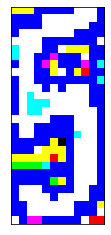

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train)
display_image(train)

In [ ]:
class CNN_Model(object):
    def __init__(self, trainable=True):
        self.batch_size = BATCH_SIZE
        self.trainable = trainable
        self.num_epochs = EPOCHS
        # Building model
        self._build_model()

        # Input data
        if trainable:
            self.model.summary()
            self.data = train
            self.y = y_train

        optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
        self.model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['acc'])

    def _build_model(self):
        # CNN model
        self.model = Sequential()
        self.model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 12, 3)))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Conv2D(32, (5, 5), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Flatten())
        self.model.add(Dense(512, activation='relu'))
        self.model.add(Dropout(0.25))
        self.model.add(Dense(32, activation='softmax'))

    def train(self):
        learning_rate_reduction = ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

        print("Training......")
        trainX = self.data
        trainY = self.y
        trainX = np.array(trainX)
        trainY = np.array(trainY)

        self.model.fit(datagen.flow(trainX, trainY, batch_size=self.batch_size), callbacks=[learning_rate_reduction], verbose=1,
                       epochs=self.num_epochs, shuffle=True)
    def predict(self):
        testX = test
        testX = np.array(testX)
        testY = np.argmax(self.model.predict(testX), axis=1)
        testY = np.array(testY)
        print("Predicting... ")
        print(testY)
    def test_pic(self, pic):
        testX = pic
        testX = np.array(testX)
        testY = np.argmax(self.model.predict(testX), axis=1)
        testY = np.array(testY)
        print("Predicting... ")
        print(testY)

In [ ]:
model = CNN_Model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 12, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 6, 32)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 2, 32)         25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 160)               0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [ ]:
model.train()

Training......
Epoch 1/50
9/9 [==============================] - 1s 32ms/step - loss: 11.2989 - acc: 0.0860 - lr: 0.0010
Epoch 2/50
9/9 [==============================] - 0s 33ms/step - loss: 2.7790 - acc: 0.2389 - lr: 0.0010
Epoch 3/50
9/9 [==============================] - 0s 32ms/step - loss: 2.4564 - acc: 0.3394 - lr: 0.0010
Epoch 4/50
9/9 [==============================] - 0s 32ms/step - loss: 2.0918 - acc: 0.4190 - lr: 0.0010
Epoch 5/50
9/9 [==============================] - 0s 32ms/step - loss: 1.5917 - acc: 0.5285 - lr: 0.0010
Epoch 6/50
9/9 [==============================] - 0s 31ms/step - loss: 1.3881 - acc: 0.5855 - lr: 0.0010
Epoch 7/50
9/9 [==============================] - 0s 35ms/step - loss: 1.1986 - acc: 0.6281 - lr: 0.0010
Epoch 8/50
9/9 [==============================] - 0s 36ms/step - loss: 1.1354 - acc: 0.6633 - lr: 0.0010
Epoch 9/50
9/9 [==============================] - 0s 36ms/step - loss: 0.8442 - acc: 0.7186 - lr: 0.0010
Epoch 10/50
9/9 [======================

In [ ]:
model.predict()

1931/1931 [==============================] - 5s 2ms/step
Predicting... 
[ 8 28  3 ...  2  5  8]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


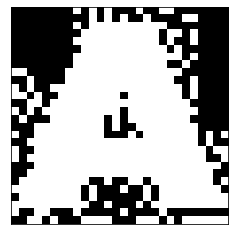

In [17]:
h_scale = MAX_HEIGHT/1000
w_scale = MAX_WIDTH/1000
img = []
resized_image = cv2.imread('class_A_3.jpg')
img.append(resized_image)
#resized_image = cv2.resize(resized_image, (12, 28))
#print(resized_image)
#img.extend([resized_image]) 
img = np.array(img, dtype = 'float32')
#img = np.asarray(img, dtype = np.float64, 
#                        order ='C')
display_image(img)
#model.test_pic(img)